# Model Comparison Showcase

This notebook analyzes and visualizes the results from `comparison_results.csv`. We compare the performance of different models (BART, Flan-T5, etc.) on legal summarization tasks, focusing on ROUGE scores, readability (Grade Level), and Explanation Count.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_theme(style="whitegrid")
pd.set_option('display.max_colwidth', None)

## 1. Load Data

In [2]:
# Load the results CSV
try:
    df = pd.read_csv('../comparison_results.csv')
    print(f"Loaded {len(df)} rows.")
    display(df.head())
except FileNotFoundError:
    print("Error: '../comparison_results.csv' not found. Please ensure the file exists in the project root.")

Loaded 15 rows.


,model,id,summary,rouge1,rougeL,grade_level,explanation_count,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,BART (Baseline),1142,"Appeal by special leave from the judgment and decree dated June 2, 1959 of the Calcutta High Court in Appeal from Appellate Decree No. 536 of 1964 . Atul Chandra Patitundi was inducted as a monthly tenant under Rai Sahib Chartdan Mal Inder Kumar, the predecessor in interest of the appellant .",0.1095,0.0730,10.026000,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Flan-T5 Base + Explicit Injection,1142,A Second Appeal of the Calcutta High Court.,0.0198,0.0158,5.230000,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,FineTuned - Mistral7B Instruct,1142,A Second Appeal of the Calcutta High Court.,0.3891,0.2796,12.352076,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BART (Baseline),4257,"Civil Appeal No. 497 of 1971 is directed against a judgment and decree of the Madhya Pradesh High Court dated May 2, 1969 . The parties have come to a settlement and the terms of the compromise have been recorded . However, the correctness of the judgment has not been confirmed .",0.0545,0.0426,6.526276,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Flan-T5 Base + Explicit Injection,4257,"A Civil Appeal No. 497 of 1971. Appeal by certificate from the Judgment and Decree dated 2.5.1969 of the High Court of Madhya Pradesh, (Indore Bench) in Civil First Appeal No. 91 of 1962.",0.0413,0.0327,3.720824,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 2. Quantitative Analysis

We aggregate the results by model to compare average performance.

In [3]:
if 'model' in df.columns:
    metrics = ['rouge1', 'rougeL', 'grade_level', 'explanation_count']
    agg_df = df.groupby('model')[metrics].mean().reset_index()
    display(agg_df)

,model,rouge1,rougeL,grade_level,explanation_count
0,BART (Baseline),0.10516,0.07610,9.007490,0.0
1,FineTuned - Mistral7B Instruct,0.50684,0.32484,11.308597,10.0
2,Flan-T5 Base + Explicit Injection,0.02958,0.02224,2.772752,3.6


### Visualizations

C:\Users\varsh\AppData\Local\Temp\ipykernel_1328\420489542.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='model', y='rouge1', data=agg_df, ax=axes[0, 0], palette='viridis')
C:\Users\varsh\AppData\Local\Temp\ipykernel_1328\420489542.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='model', y='rougeL', data=agg_df, ax=axes[0, 1], palette='viridis')
C:\Users\varsh\AppData\Local\Temp\ipykernel_1328\420489542.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='model', y='grade_level', data=agg_df, ax=axes[1, 0], palette='magma')

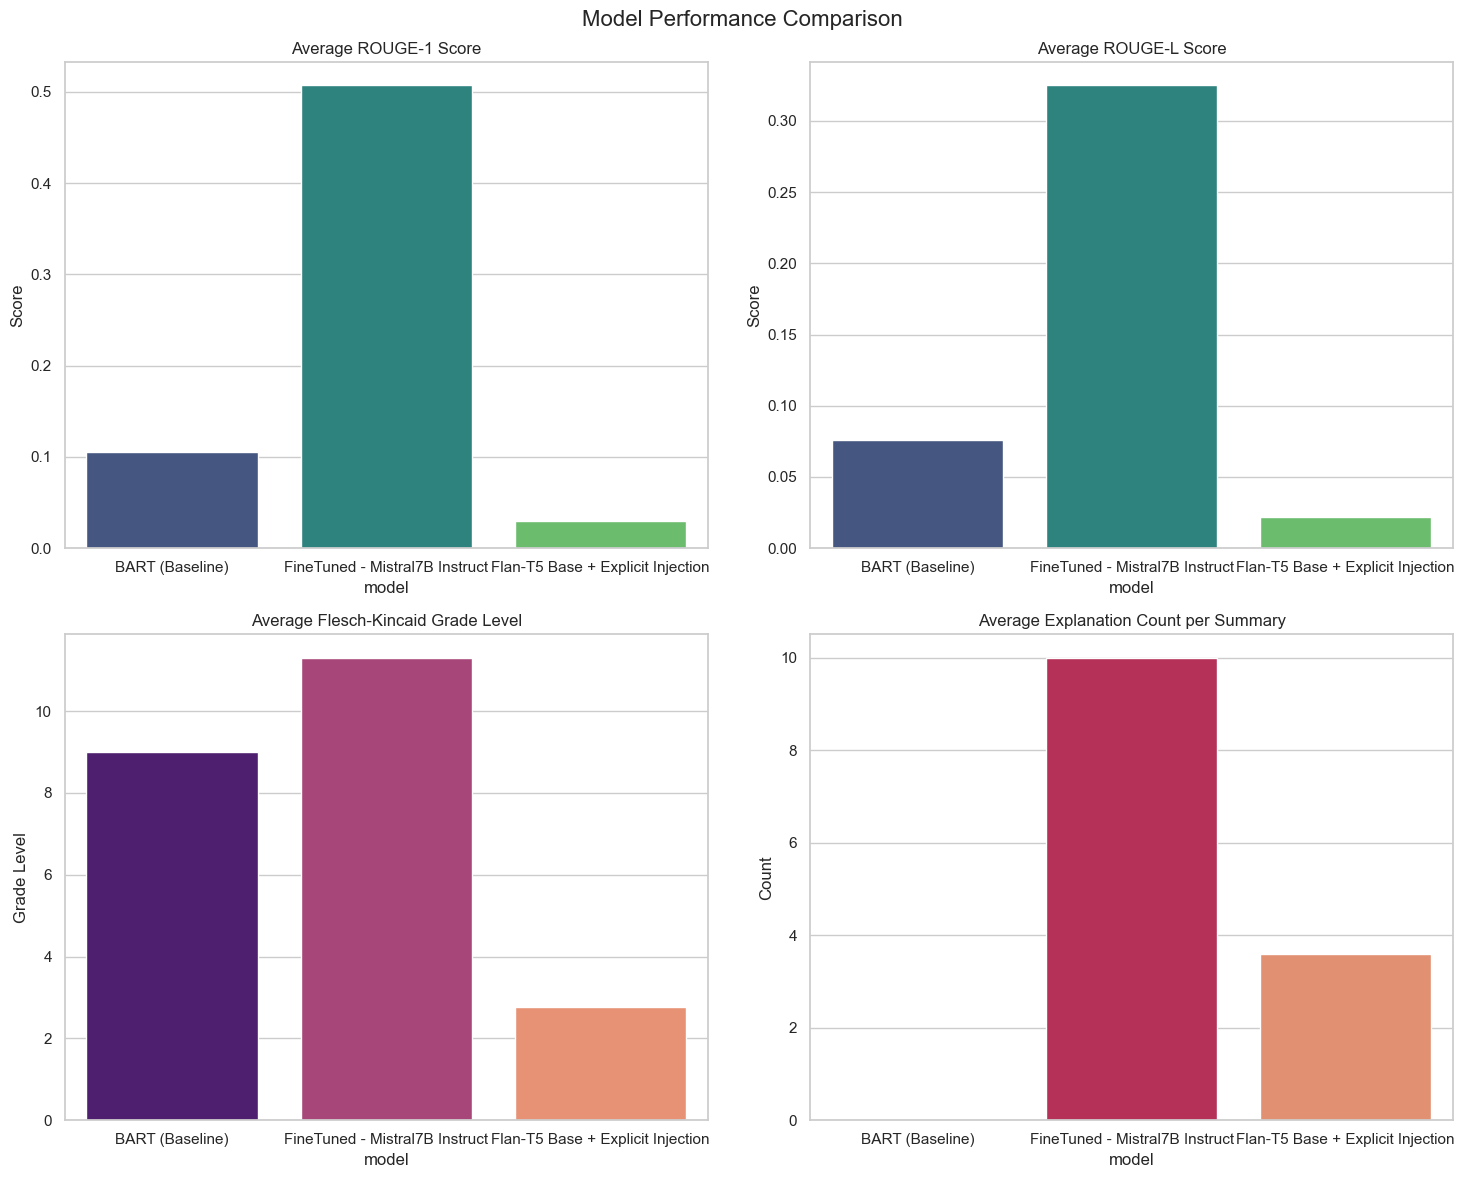

In [4]:
if 'model' in df.columns:
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle('Model Performance Comparison', fontsize=16)

    # ROUGE-1
    sns.barplot(x='model', y='rouge1', data=agg_df, ax=axes[0, 0], palette='viridis')
    axes[0, 0].set_title('Average ROUGE-1 Score')
    axes[0, 0].set_ylabel('Score')

    # ROUGE-L
    sns.barplot(x='model', y='rougeL', data=agg_df, ax=axes[0, 1], palette='viridis')
    axes[0, 1].set_title('Average ROUGE-L Score')
    axes[0, 1].set_ylabel('Score')

    # Grade Level
    sns.barplot(x='model', y='grade_level', data=agg_df, ax=axes[1, 0], palette='magma')
    axes[1, 0].set_title('Average Flesch-Kincaid Grade Level')
    axes[1, 0].set_ylabel('Grade Level')

    # Explanation Count
    sns.barplot(x='model', y='explanation_count', data=agg_df, ax=axes[1, 1], palette='rocket')
    axes[1, 1].set_title('Average Explanation Count per Summary')
    axes[1, 1].set_ylabel('Count')

    plt.tight_layout()
    plt.show()

## 3. Qualitative Analysis

Let's look at specific examples to see how the summaries differ.

In [5]:
# Filter for a specific ID to compare the same document across models
sample_id = df['id'].iloc[0] if not df.empty else None

if sample_id is not None:
    print(f"Comparison for Document ID: {sample_id}\n")
    sample_df = df[df['id'] == sample_id]
    for _, row in sample_df.iterrows():
        print(f"--- {row['model']} ---")
        print(f"ROUGE-1: {row['rouge1']} | Grade: {row['grade_level']} | Explanations: {row['explanation_count']}")
        print(row['summary'])
        print("\n")

Comparison for Document ID: 1142

--- BART (Baseline) ---
ROUGE-1: 0.1095 | Grade: 10.026 | Explanations: 0
 Appeal by special leave from the judgment and decree dated June 2, 1959 of the Calcutta High Court in Appeal from Appellate Decree No. 536 of 1964 . Atul Chandra Patitundi was inducted as a monthly tenant under Rai Sahib Chartdan Mal Inder Kumar, the predecessor in interest of the appellant .


--- Flan-T5 Base + Explicit Injection ---
ROUGE-1: 0.0198 | Grade: 5.23 | Explanations: 6
A Second Appeal of the Calcutta High Court.


--- FineTuned - Mistral7B Instruct ---
ROUGE-1: 0.3891 | Grade: 12.35207647 | Explanations: 14
A Second Appeal of the Calcutta High Court.


